In [1]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x=np.sin(np.arange(0,10.1,0.1)).reshape(-1, 1)

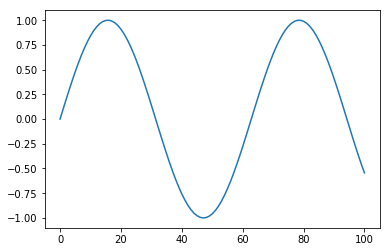

In [3]:
plt.plot(x)

In [4]:
adjacencyMatrix=np.eye(len(x),k=1)+np.eye(len(x),k=-1)
xmin=np.min(x)
xmax=np.max(x)
x[np.argmin(x)]=-2
x[np.argmax(x)]=2

In [5]:
clustering = AgglomerativeClustering(
    n_clusters=20, linkage='ward', connectivity=adjacencyMatrix)
clusterOrder = clustering.fit_predict(x)

In [6]:
def meanRepresentation(candidates, clusterOrder):
    '''
    Represents the candidates of a given cluster group (clusterOrder)
    by its mean.

    Parameters
    ----------
    candidates: np.ndarray, required
        Dissimilarity matrix where each row represents a candidate
    clusterOrder: np.array, required
        Integer array where the index refers to the candidate and the
        Integer entry to the group.
    '''
    # set cluster centers as means of the group candidates
    clusterCenters = []
    predicted=candidates
    for clusterNum in np.unique(clusterOrder):
        indice = np.where(clusterOrder == clusterNum)
        currentMean = candidates[indice].mean(axis=0)
        predicted[indice]=currentMean
        clusterCenters.append(currentMean)
    return clusterCenters, predicted

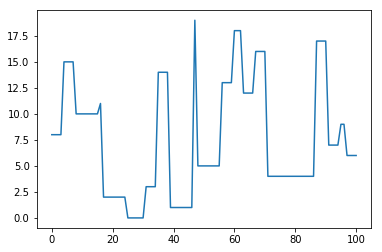

In [7]:
plt.plot(clusterOrder)

In [8]:
clusterCenters, predicted = meanRepresentation(x, clusterOrder)
predicted[np.argmin(x)]=xmin
predicted[np.argmax(x)]=xmax

In [9]:
clusterCenters

[array([0.37611848]),
 array([-0.87167633]),
 array([0.86424801]),
 array([-0.10752007]),
 array([0.89706173]),
 array([-0.88217289]),
 array([-0.40994919]),
 array([0.17280453]),
 array([0.14850574]),
 array([-0.12473895]),
 array([0.88898792]),
 array([2.]),
 array([0.16500611]),
 array([-0.50510776]),
 array([-0.48374943]),
 array([0.51942601]),
 array([0.53359741]),
 array([0.54025644]),
 array([-0.1815558]),
 array([-2.])]

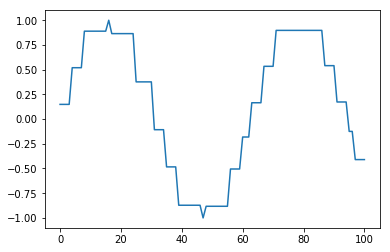

In [10]:
plt.plot(predicted)